In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [12]:
print("Loading test and train data part 4")
data_part = np.load("..\mnist_split_data_5\mnist_part4.npz")
x_train = data_part['x_train']
y_train = data_part['y_train']
x_test = data_part['x_test']
y_test = data_part['y_test']
print(f"Loaded {x_test.shape[0]} test samples. and {x_train.shape[0]} train samples")

Loading test and train data part 4
Loaded 2001 test samples. and 11999 train samples


In [13]:
print("\nLoading model architecture from model4.h5...")
model = keras.models.load_model('..\saved_models\mnist_model_v4.h5')
print("model loaded successfully.")


Loading model architecture from model4.h5...


model loaded successfully.


In [14]:
print("Setting average weights from average_weights.h5...")
model.load_weights('../saved_models/averaged.weights.h5')
print("✅ Successfully set the average weights into the model!")

Setting average weights from average_weights.h5...
✅ Successfully set the average weights into the model!


In [15]:
x_train = x_train / 255
x_test = x_test / 255

x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Optimized learning rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("model compiled successfully.")


model compiled successfully.


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
history = model.fit(
    x_train_flatten, y_train,
    epochs=30,          
    batch_size=64,     
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7854 - loss: 0.7694 - val_accuracy: 0.9017 - val_loss: 0.6716
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8873 - loss: 0.4311 - val_accuracy: 0.9067 - val_loss: 0.3180
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9008 - loss: 0.3554 - val_accuracy: 0.9033 - val_loss: 0.3236
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9079 - loss: 0.3207 - val_accuracy: 0.9183 - val_loss: 0.2641
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9152 - loss: 0.2922 - val_accuracy: 0.9392 - val_loss: 0.2134
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9201 - loss: 0.2764 - val_accuracy: 0.9258 - val_loss: 0.2451
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9255 - loss: 0.2599 - val_accuracy: 0.9217 - val_loss: 0.2577
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9271 - loss: 0.2386 - val_accuracy: 0.

In [19]:
print("\nEvaluating the model on the test set...")
test_loss, test_accuracy = model.evaluate(x_test_flatten, y_test, verbose=2)

# Get final training accuracy from history
train_accuracy = history.history['accuracy'][-1]

print("\n" + "="*60)
print(f"🎯 Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"🎯 Test Accuracy:     {test_accuracy * 100:.2f}%")
print(f"   Difference:        {abs(train_accuracy - test_accuracy) * 100:.2f}%")
print("="*60)


Evaluating the model on the test set...
63/63 - 0s - 3ms/step - accuracy: 0.9470 - loss: 0.1798

🎯 Training Accuracy: 95.43%
🎯 Test Accuracy:     94.70%
   Difference:        0.73%


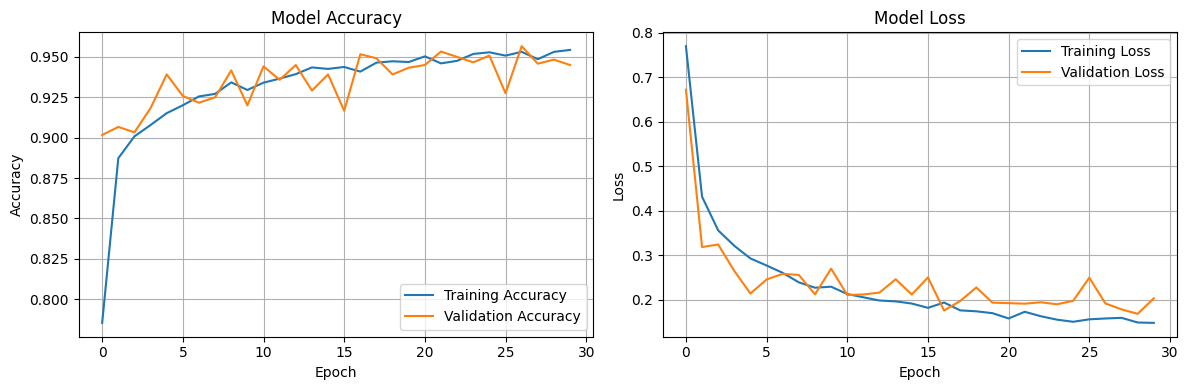

Final Training Accuracy: 95.43%
Final Validation Accuracy: 94.50%


In [20]:
# ...existing code...
# Plot training history to check for overfitting
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
# ...existing code...